# Import libraries

In [81]:
import pandas as pd

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import itertools

# Read data 

In [82]:
df = pd.read_csv("water_potability.csv")

# Understand the data

In [83]:
print("Data shape: " + str(df.shape) + "\n")     # Shape of data frame

Data shape: (3276, 10)



In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [85]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

# Data Cleaning

In [86]:
duplicate_rows = (df.duplicated().sum()) # Check for duplicates

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**-> No duplicates to handle**

In [87]:
# Check for missing values
missing_values = df.isna().sum() 
print(f"Missing values: \n{missing_values}")

Missing values: 
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [88]:
# Handling missing values by replacing them with the mean of the column
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Check for missing values after handling them
missing_values = df.isnull().sum()
print(f"Missing values after handling: \n{missing_values}")


Missing values after handling: 
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


C:\Users\quang\AppData\Local\Temp\ipykernel_19708\867518488.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [89]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

## Plot multiple boxplots to visualize outliers


In [90]:
columns = df.columns
columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [91]:
cols = [col for col in columns]
cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

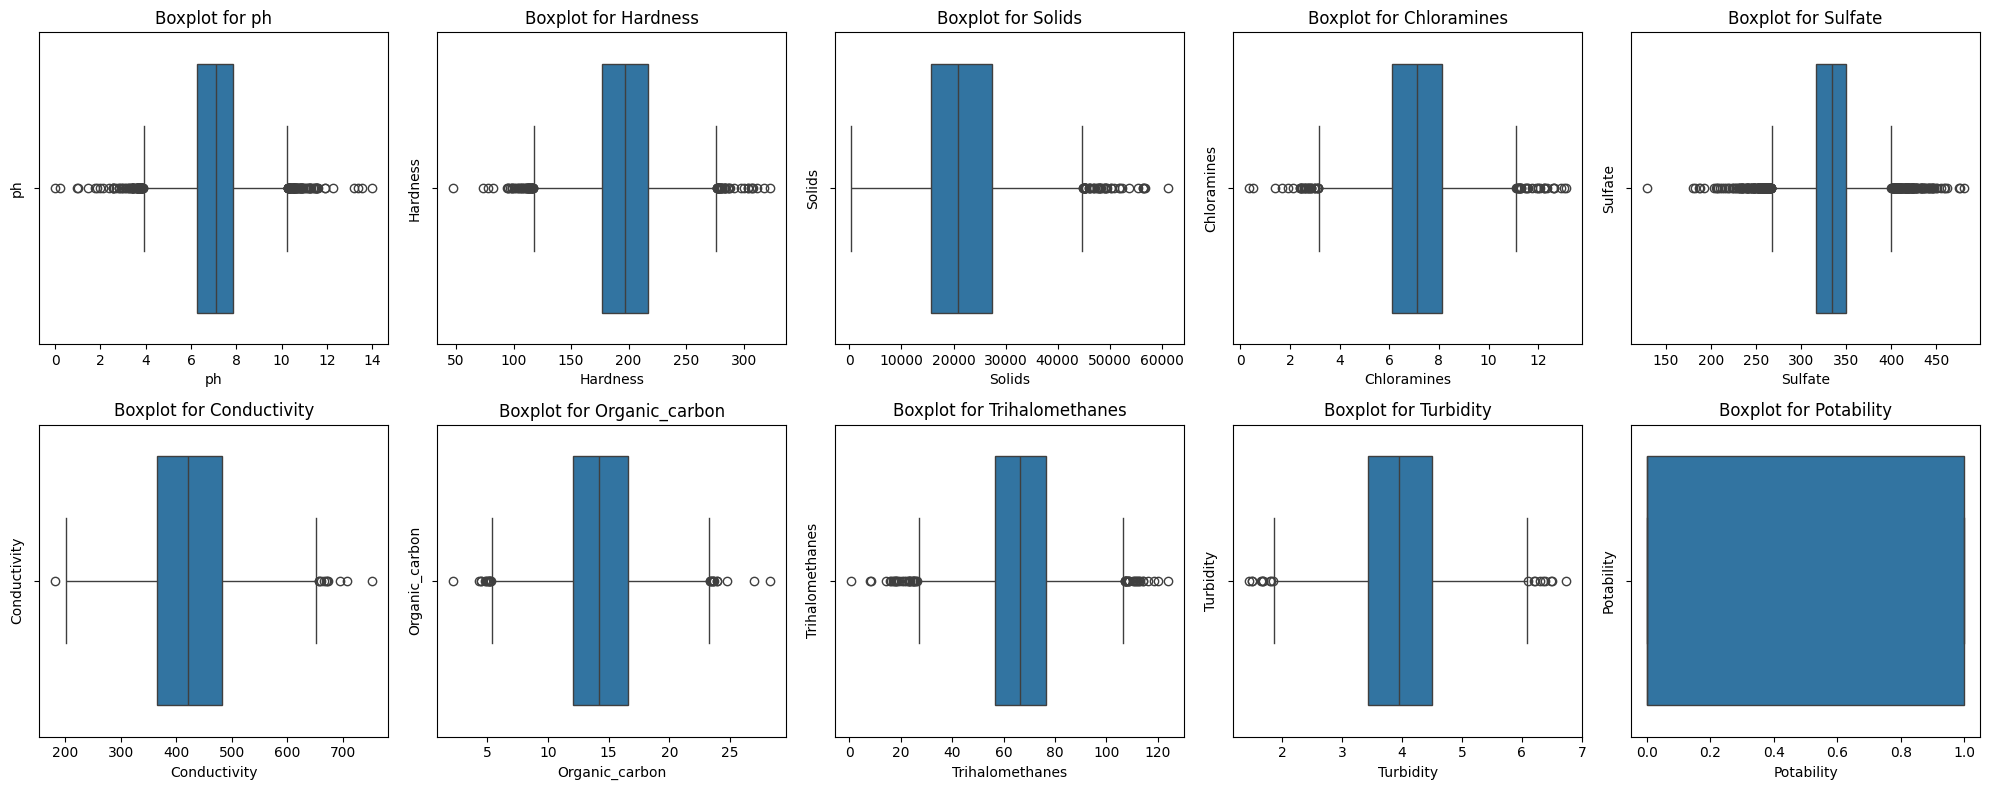

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, column in enumerate(columns):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

<Axes: >

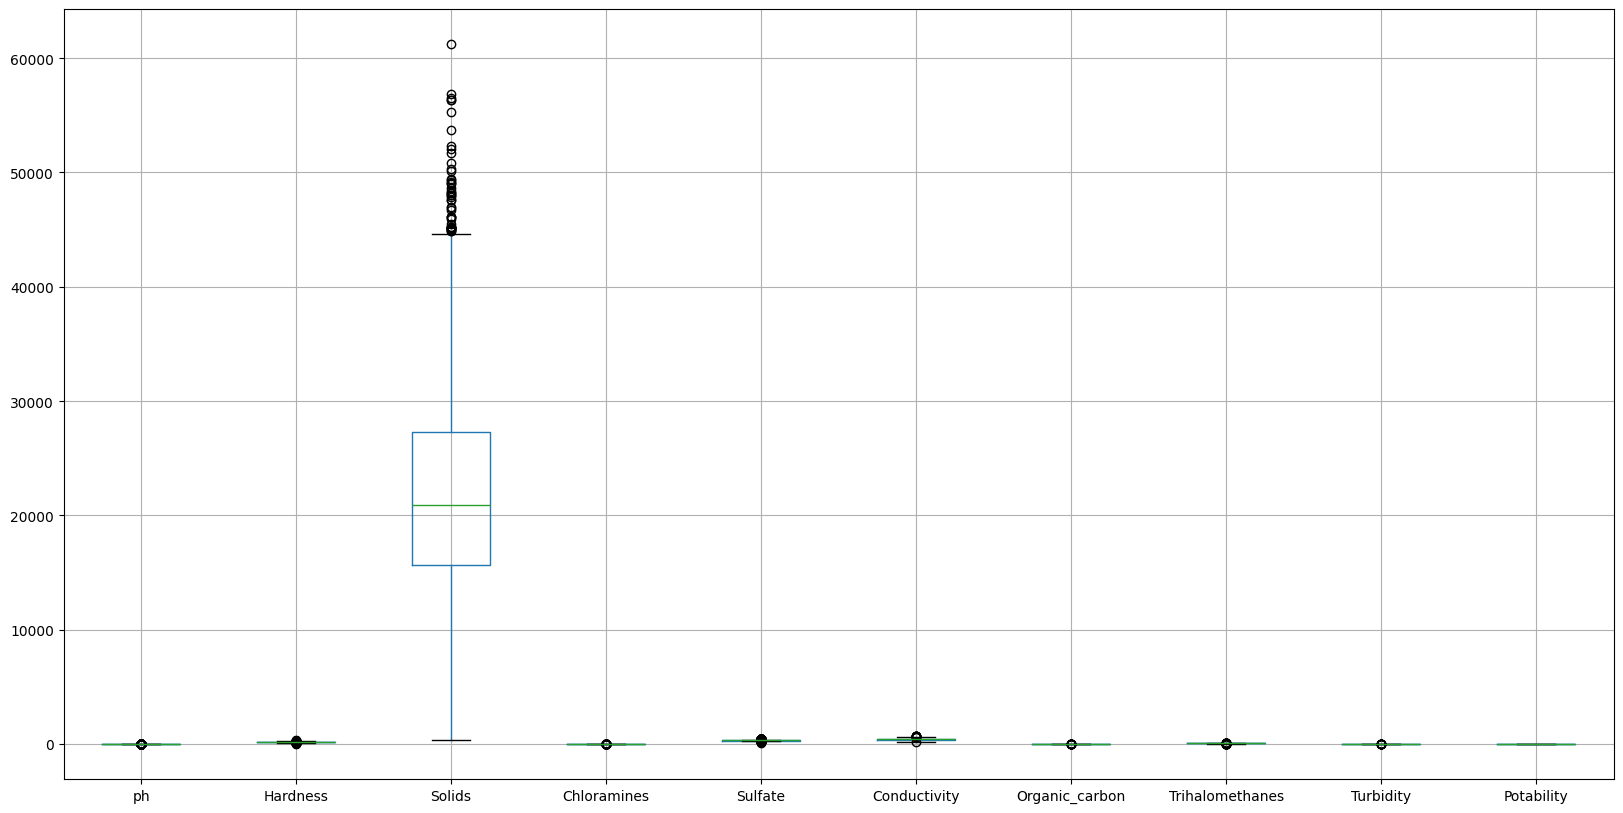

In [93]:
# # Before scaling
df.boxplot(column=cols, figsize=(20, 10))


In [94]:
# Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows with outliers in this column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


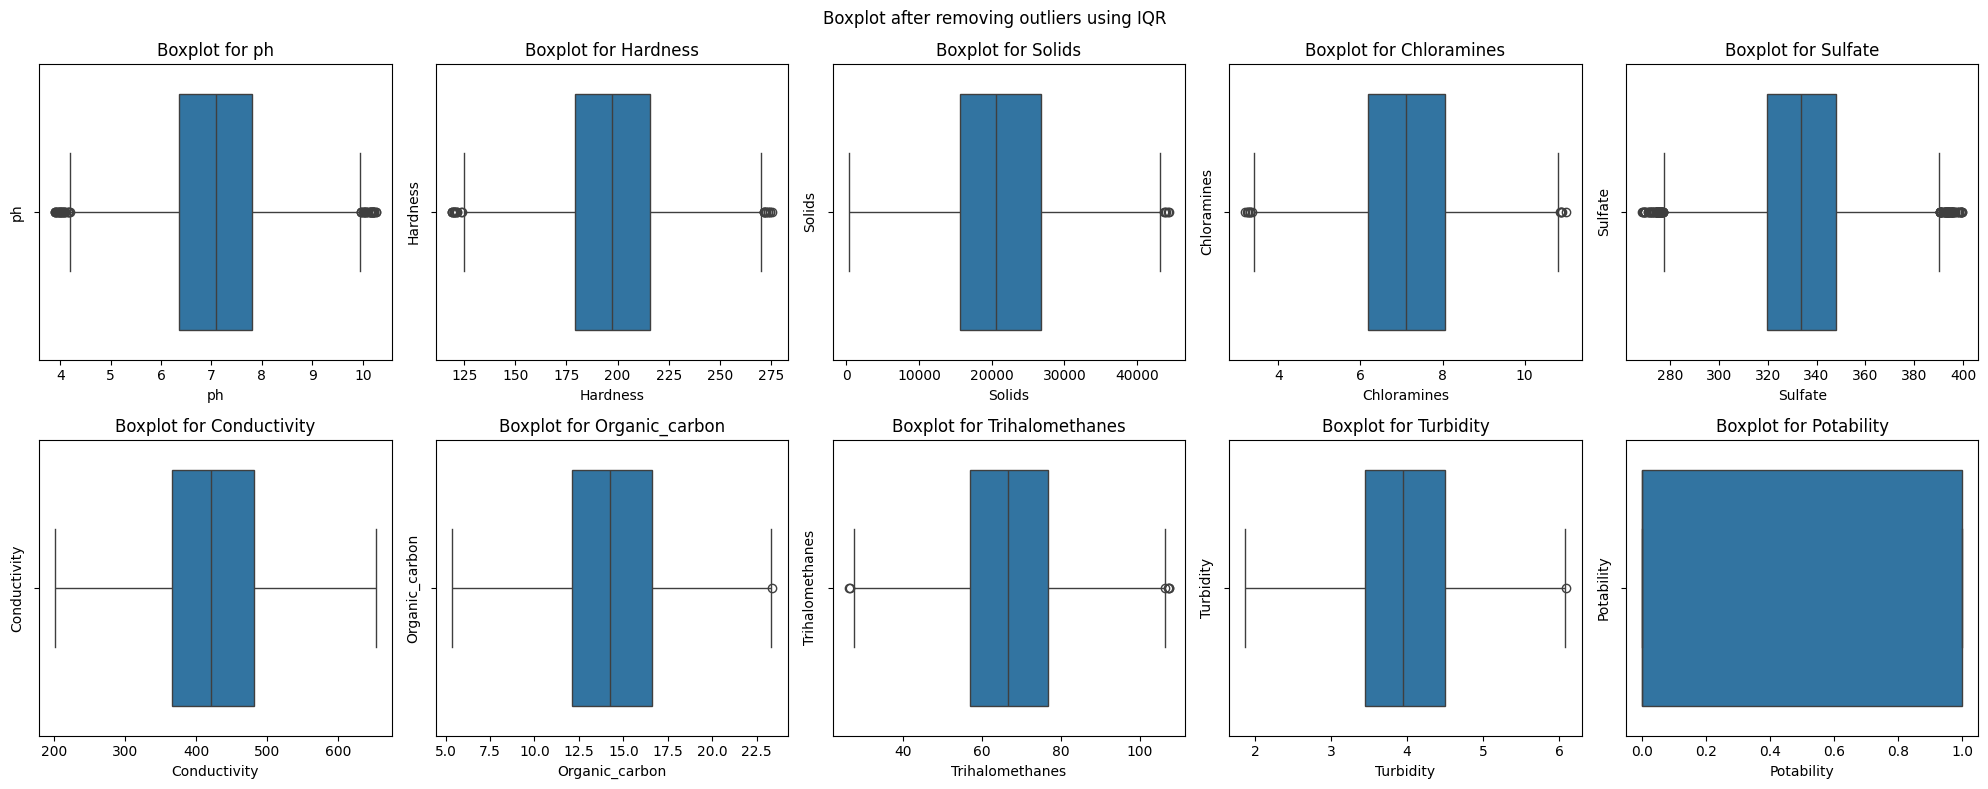

In [95]:

# Remove outliers using IQR for all columns
cleaned_df = df.copy()
for column in columns:
    cleaned_df = remove_outliers_iqr(cleaned_df, column)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, column in enumerate(columns):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    sns.boxplot(data=cleaned_df, x=column, ax=ax)
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel(column)

plt.suptitle('Boxplot after removing outliers using IQR')
plt.tight_layout()
plt.show()


In [96]:
cleaned_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
5     5.584087  188.313324  28748.687739     7.544869  326.678363   
...        ...         ...           ...          ...         ...   
3270  6.069616  186.659040  26138.780191     7.747547  345.700257   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
...            ...             ...              ...        ...         ...  
3270    415.886955       12.067620        60.419921   3.669712           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[2657 rows x 10 columns]

# 5. EDA


## 5.1 Variable Identification
Target Variable: Potability (0: Not Potable, 1: Potable)

Predictors (Input Variables): ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity

## 5.2 Univariate Analysis

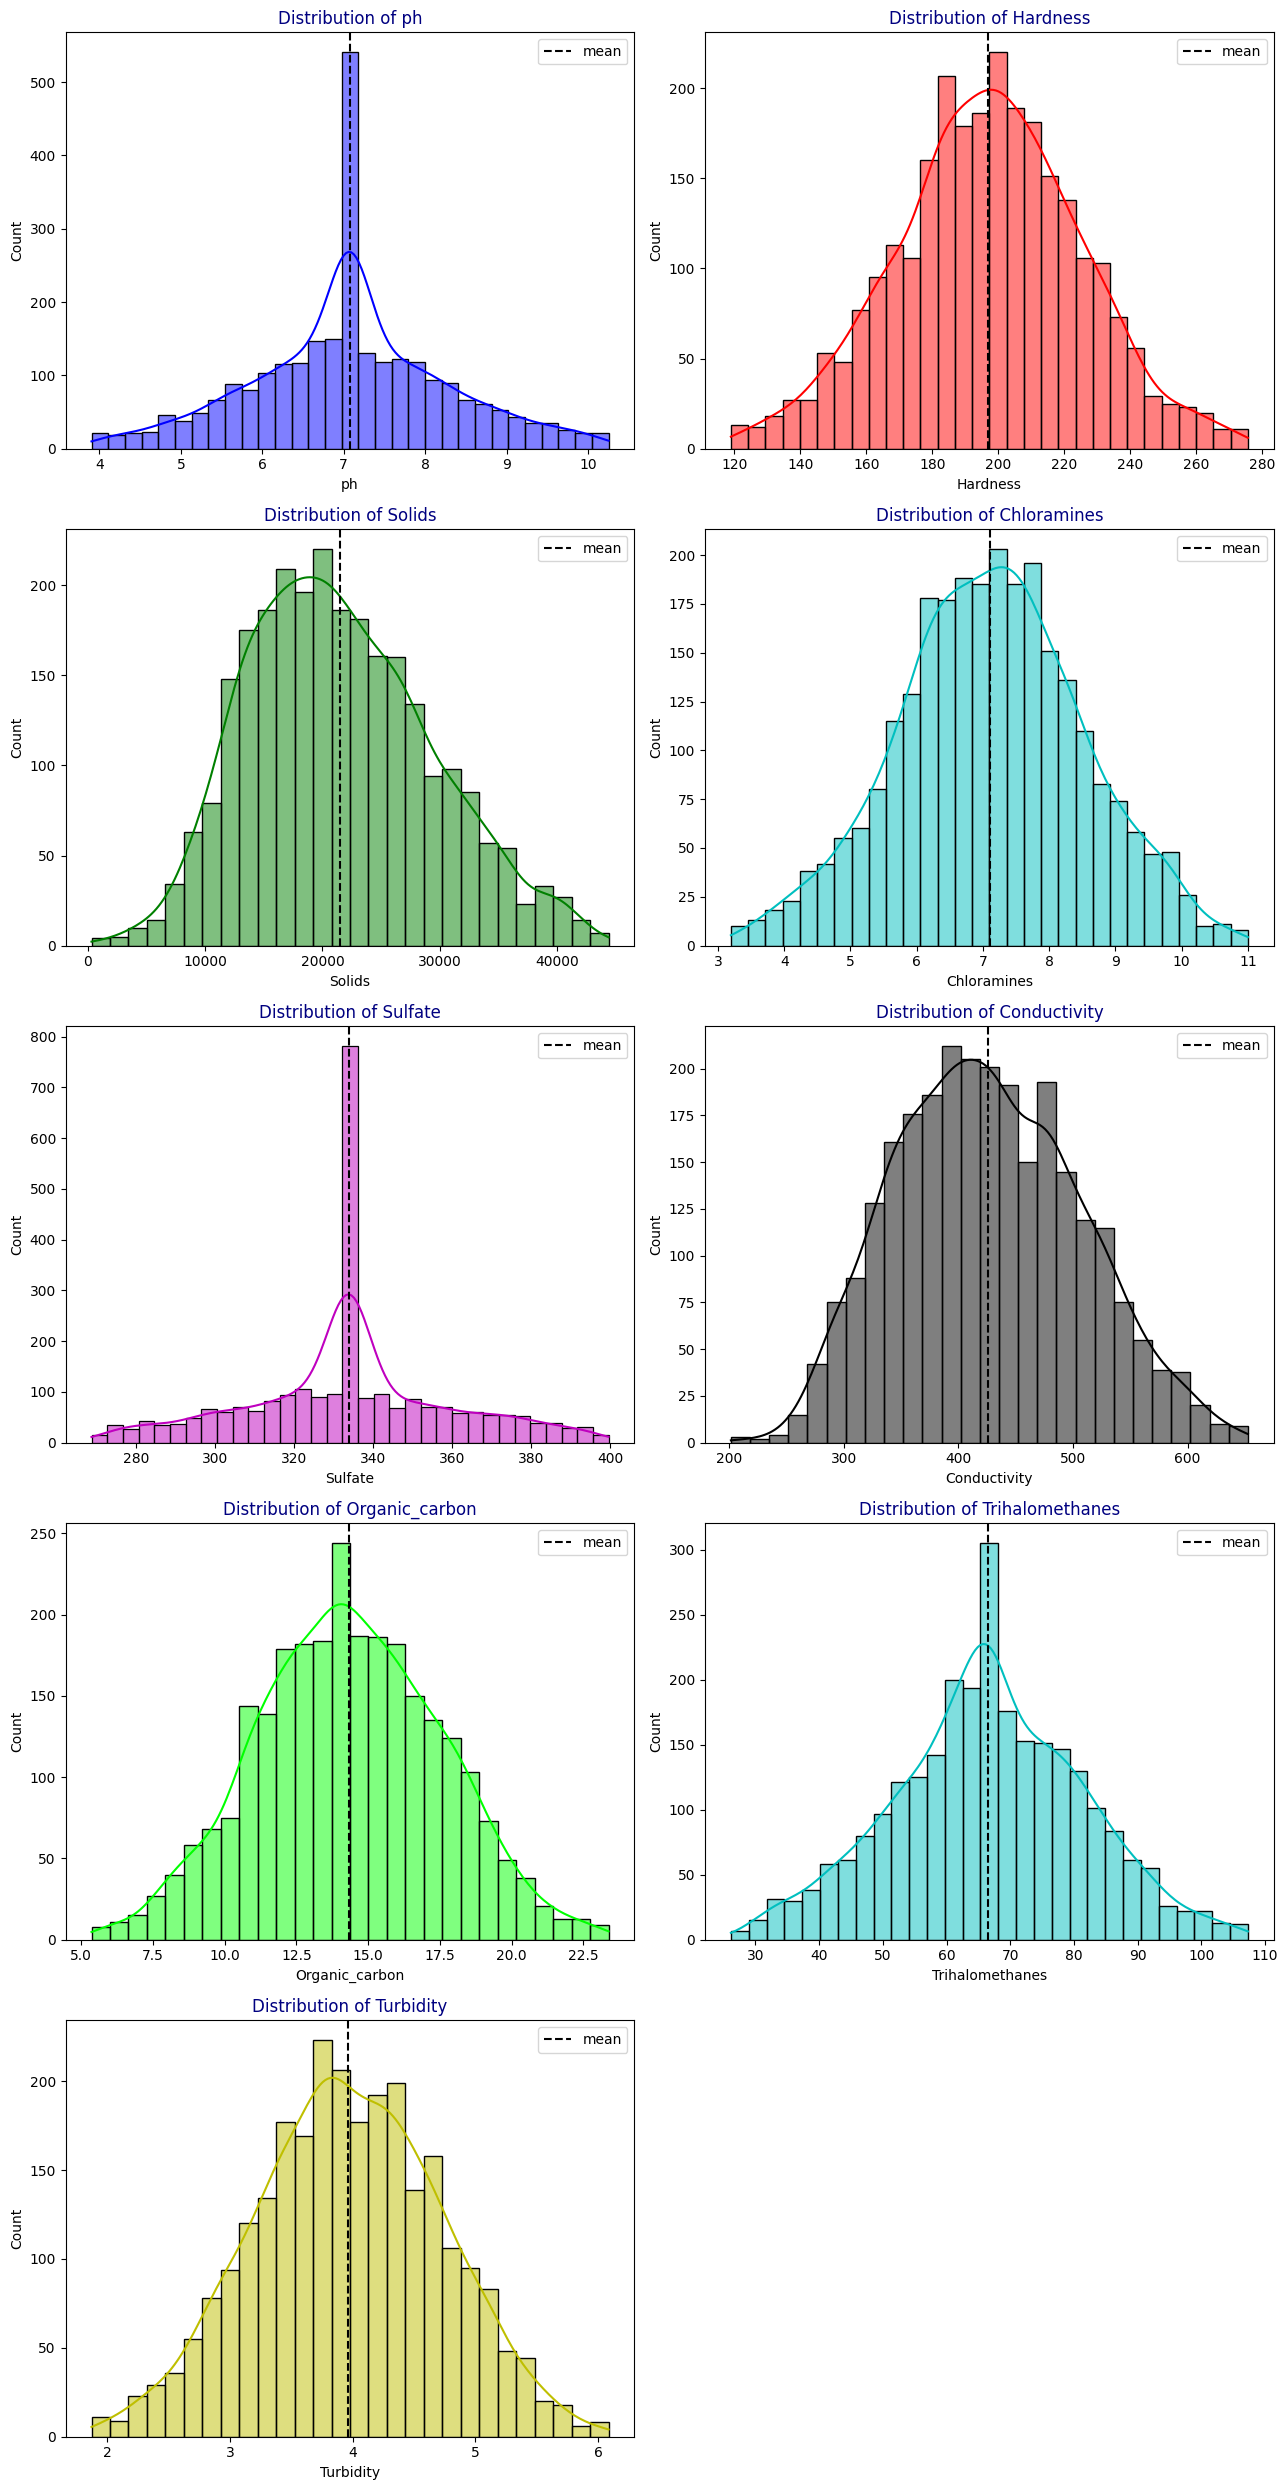

In [97]:
# Univariate Analysis for Numerical Columns
cols = cleaned_df.columns[:-1]  # Excluding target variable
length = len(cols)
colors = ["b", "r", "g", "c", "m", "k", "lime", "c", "y"]

fig = plt.figure(figsize=(13, 25))

for i, (col, color) in enumerate(zip(cols, colors)):
    plt.subplot(5, 2, i + 1)
    sns.histplot(cleaned_df[col], kde=True, color=color)
    plt.axvline(cleaned_df[col].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(f'Distribution of {col}', color="navy")

plt.tight_layout()
plt.show()


# 5.3 Check for imbalance in the target variable

In [98]:
sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability Classes')
plt.show()

## 5.3 Study Summary Statistics

In [99]:
# Summary Statistics
summary = cleaned_df.describe()
summary

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2657.000000  2657.000000   2657.000000  2657.000000  2657.000000   
mean      7.077898   196.987221  21465.542889     7.111240   333.851905   
std       1.214608    28.266583   7873.882113     1.410896    26.263921   
min       3.902476   118.988579    320.942611     3.194969   268.646941   
25%       6.353437   178.998245  15613.160533     6.192193   319.737009   
50%       7.080795   197.517093  20574.364258     7.116809   333.775777   
75%       7.793834   215.648216  26730.192613     8.051538   347.930400   
max      10.252816   275.679780  44376.187382    10.999995   399.617217   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2657.000000     2657.000000      2657.000000  2657.000000  2657.000000  
mean     425.738024       14.326481        66.476449     3.962308     0.373730  
std       79.907395        3.224768        14.976547     0.761498     0.483884  
min      201.619737        5.362371        26.140863     1.872573     0.000000  
25%      365.626487       12.095251        56.949724     3.439476     0.000000  
50%      421.220228       14.243374        66.396293     3.947138     0.000000  
75%      481.318803       16.584571        76.694580     4.494544     1.000000  
max      652.537592       23.373265       107.306343     6.083772     1.000000

## 5.4 Multivariate Analysis

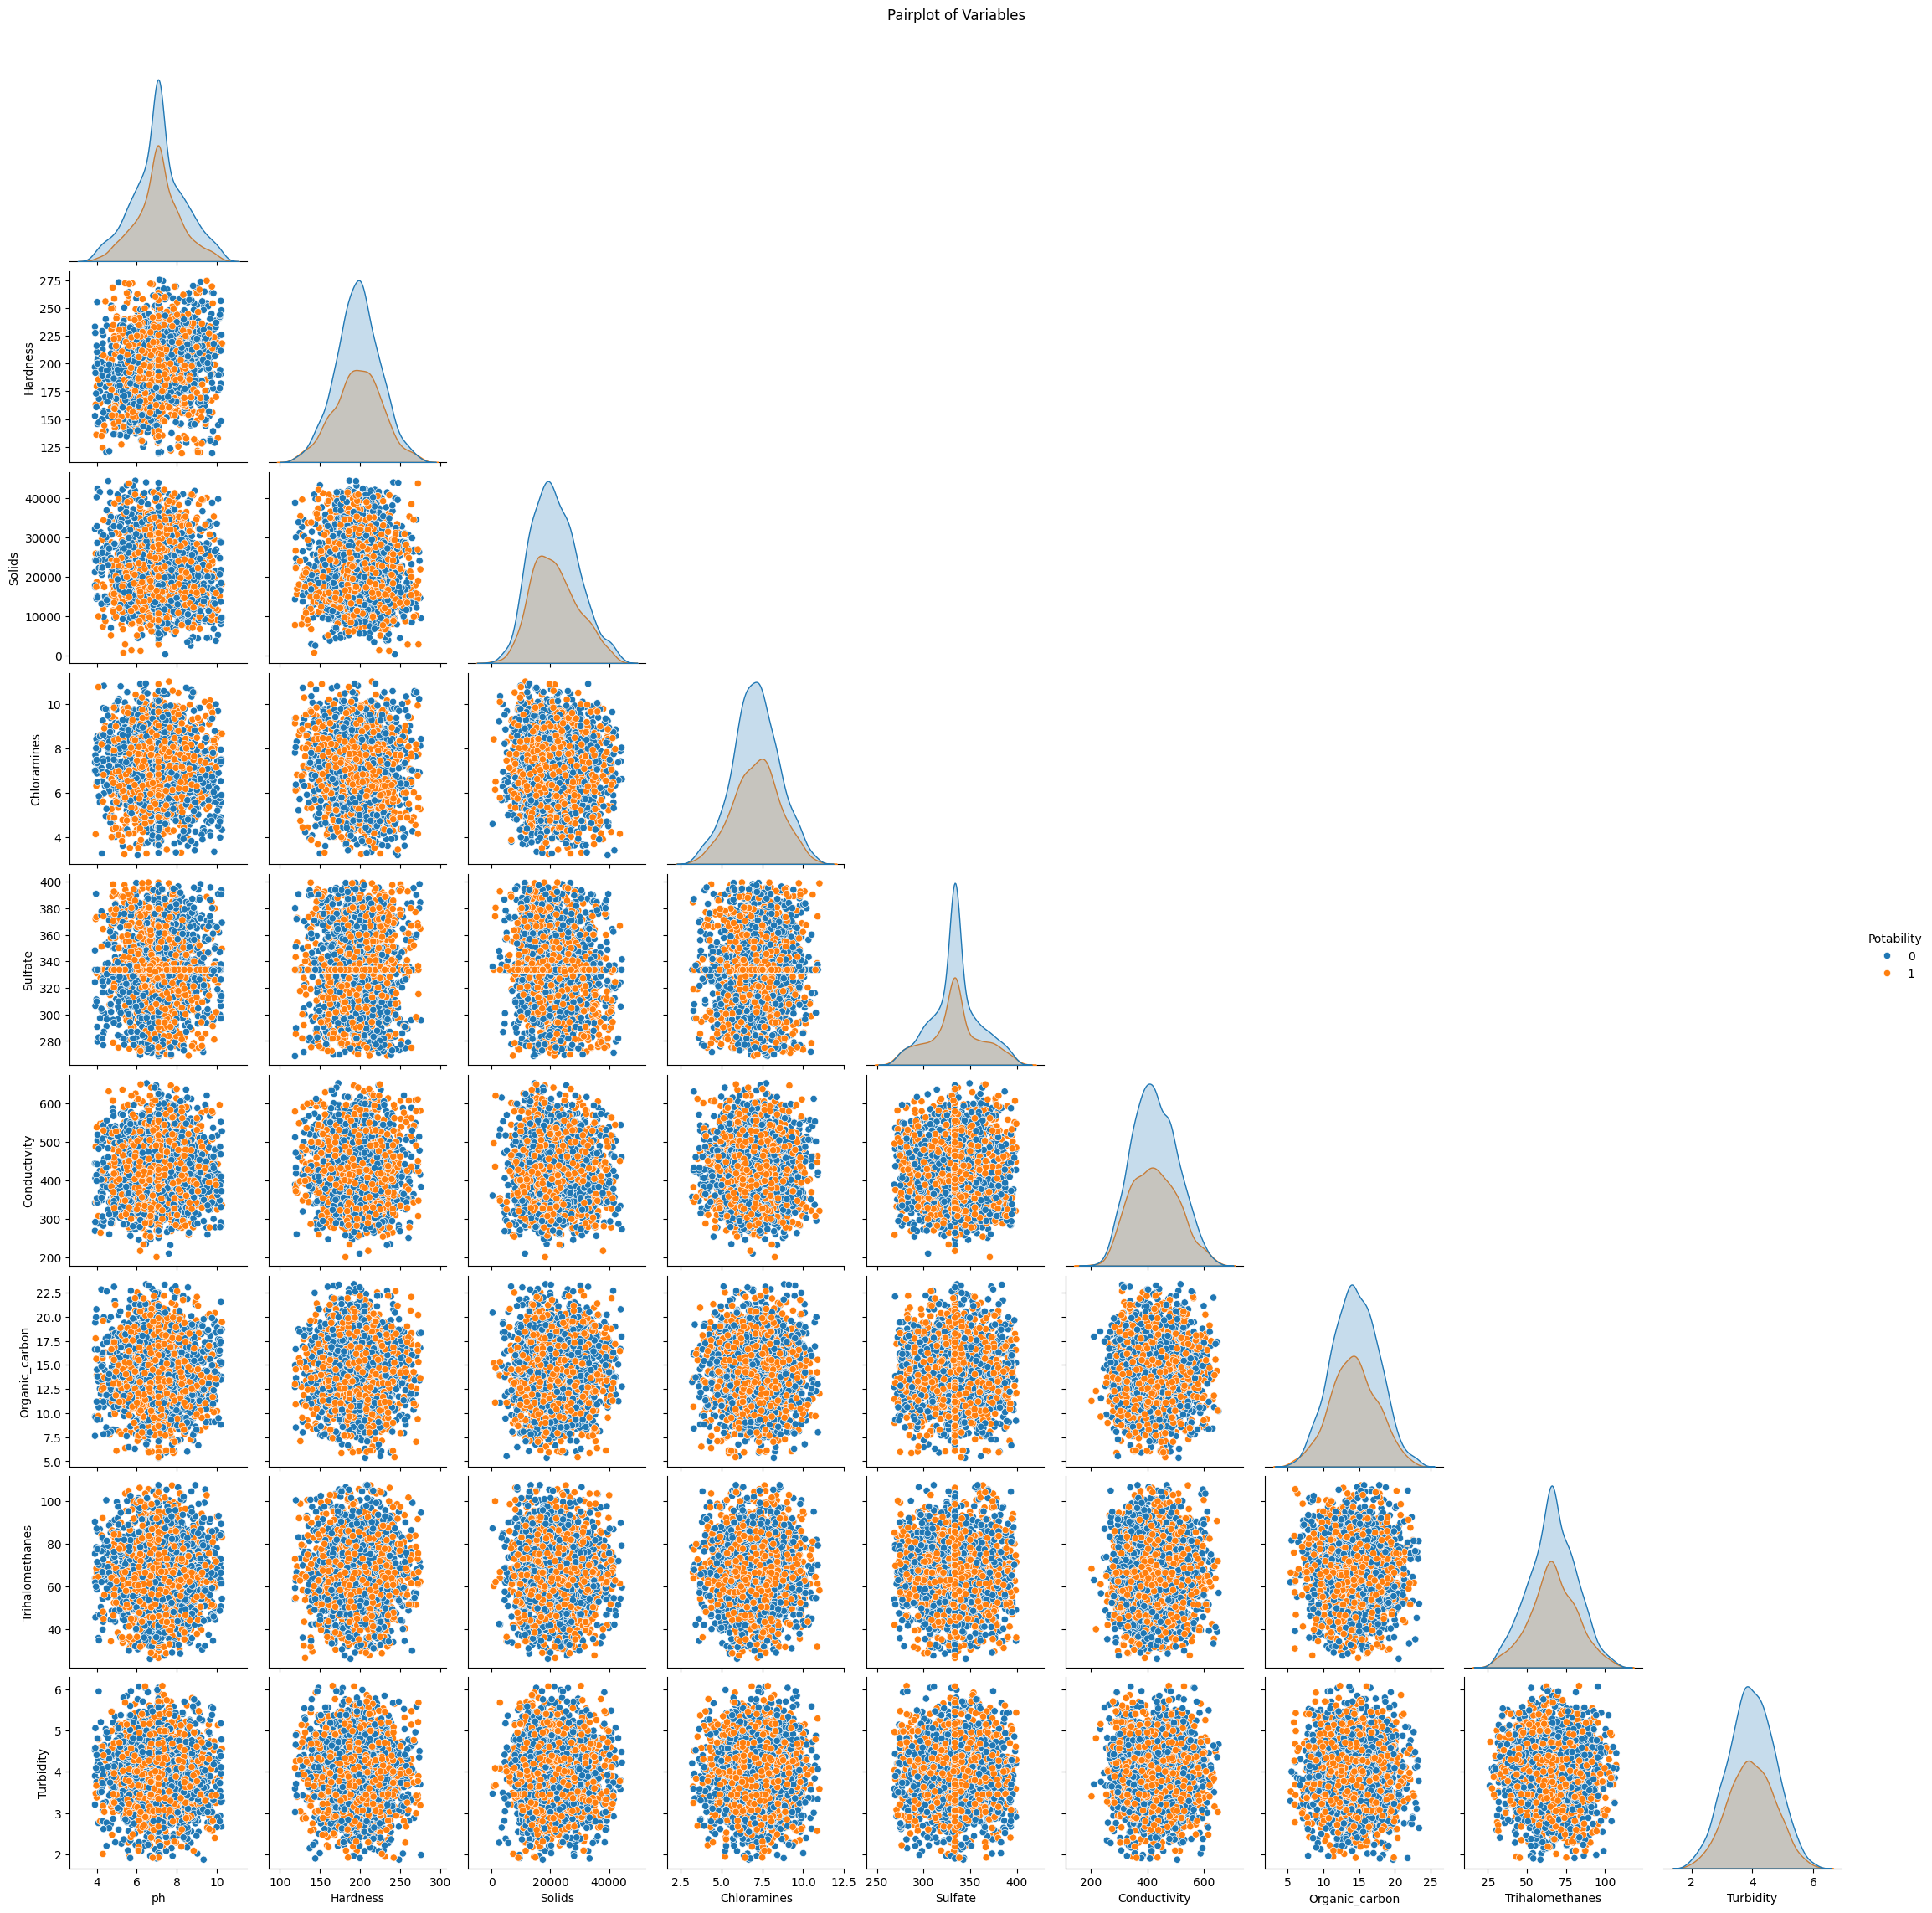

In [100]:
# Pairplot to explore relationships between variables
sns.pairplot(cleaned_df, hue='Potability', diag_kind='kde', corner='true')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

## 5.5 Study Correlation



In [101]:
cleaned_df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.133697 -0.083710    -0.062465  0.014125   
Hardness         0.133697  1.000000 -0.045134    -0.040386 -0.026137   
Solids          -0.083710 -0.045134  1.000000    -0.040626 -0.112595   
Chloramines     -0.062465 -0.040386 -0.040626     1.000000  0.023546   
Sulfate          0.014125 -0.026137 -0.112595     0.023546  1.000000   
Conductivity     0.005026 -0.026213  0.002585    -0.015303 -0.002098   
Organic_carbon   0.024624  0.013528  0.024597     0.003802 -0.008078   
Trihalomethanes  0.009009 -0.003313 -0.023054     0.018862 -0.017656   
Turbidity       -0.043474 -0.025089  0.024193    -0.007379 -0.021946   
Potability      -0.008261 -0.000347  0.007164     0.012948 -0.011607   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.005026        0.024624         0.009009  -0.043474   
Hardness            -0.026213        0.013528        -0.003313  -0.025089   
Solids               0.002585        0.024597        -0.023054   0.024193   
Chloramines         -0.015303        0.003802         0.018862  -0.007379   
Sulfate             -0.002098       -0.008078        -0.017656  -0.021946   
Conductivity         1.000000        0.008096         0.002231   0.010756   
Organic_carbon       0.008096        1.000000        -0.001124  -0.020313   
Trihalomethanes      0.002231       -0.001124         1.000000  -0.024215   
Turbidity            0.010756       -0.020313        -0.024215   1.000000   
Potability           0.000513       -0.030161         0.014416   0.004178   

                 Potability  
ph                -0.008261  
Hardness          -0.000347  
Solids             0.007164  
Chloramines        0.012948  
Sulfate           -0.011607  
Conductivity       0.000513  
Organic_carbon    -0.030161  
Trihalomethanes    0.014416  
Turbidity          0.004178  
Potability         1.000000

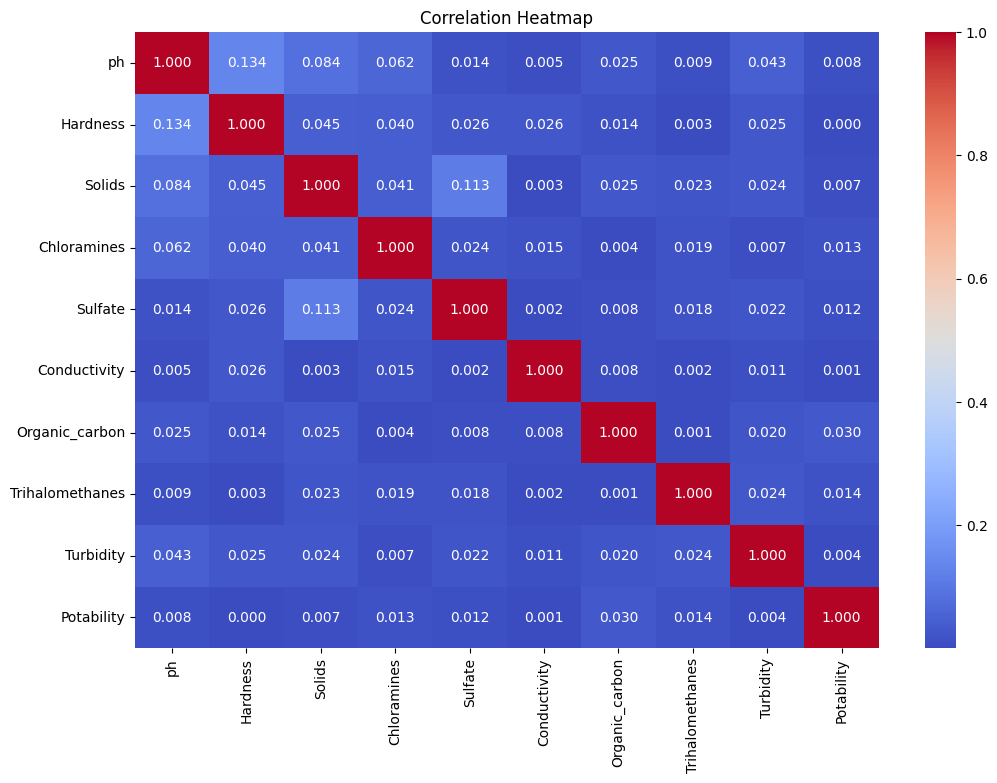

In [102]:
# Heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(abs(cleaned_df.corr()), annot=True, cmap="coolwarm", fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

In [103]:
# Pairplot to explore relationships between variables
sns.pairplot(cleaned_df, hue='Potability', kind='reg')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

## 5.6 EDA (Exploratory Data Analysis) Summary

# Data preprocessing

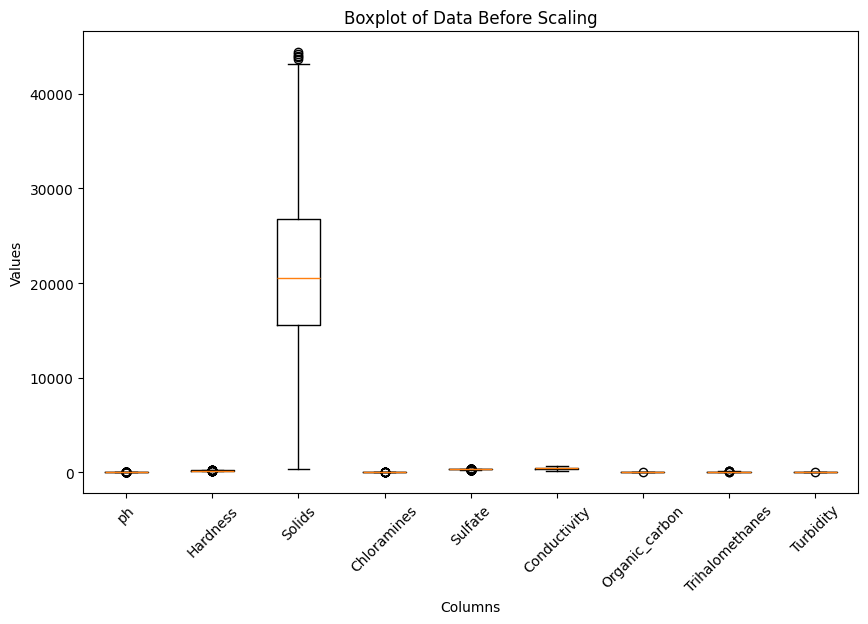

In [104]:
# Before data scaling

plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df[cols])
plt.xticks(range(1, len(cols) + 1), cols, rotation=45)
plt.title('Boxplot of Data Before Scaling')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [105]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=columns)

df_scaled

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.505771  0.571139  0.336096     0.543891  0.680385      0.669439   
1     0.265434  0.297400  0.300611     0.491839  0.581699      0.719411   
2     0.578509  0.641311  0.321619     0.698543  0.581699      0.414652   
3     0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4     0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   
...        ...       ...       ...          ...       ...           ...   
3271  0.333436  0.530482  0.775947     0.533436  0.656047      0.603192   
3272  0.557775  0.530016  0.279263     0.603473  0.581699      0.368912   
3273  0.672822  0.465486  0.539101     0.547807  0.581699      0.438152   
3274  0.366197  0.664407  0.191490     0.465860  0.581699      0.387157   
3275  0.562477  0.535635  0.280484     0.560259  0.581699      0.255266   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           0.313402         0.699753   0.286091         0.0  
1           0.497319         0.450999   0.576793         0.0  
2           0.562017         0.532866   0.303637         0.0  
3           0.622089         0.808065   0.601015         0.0  
4           0.358555         0.253606   0.496327         0.0  
...              ...              ...        ...         ...  
3271        0.448062         0.535037   0.564534         1.0  
3272        0.678284         0.532673   0.254915         1.0  
3273        0.338662         0.560655   0.349570         1.0  
3274        0.343638         0.622659   0.616120         1.0  
3275        0.534114         0.632478   0.162441         1.0  

[3276 rows x 10 columns]

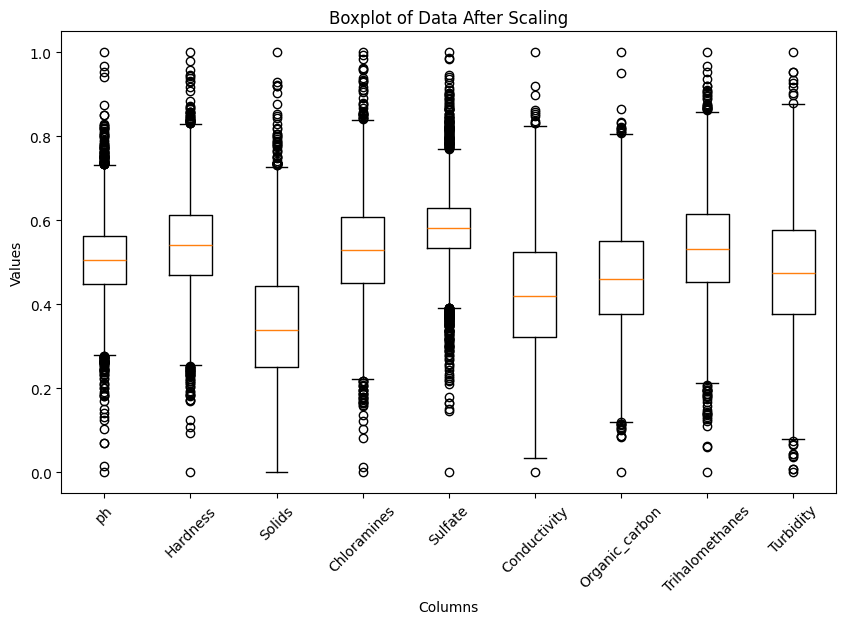

In [106]:
# After scaling

plt.figure(figsize=(10, 6))
plt.boxplot(df_scaled[cols])
plt.xticks(range(1, len(cols) + 1), cols, rotation=45)
plt.title('Boxplot of Data After Scaling')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# 3. Feature Engineering and Feature Selection

Creating new features 

In [107]:
#This ratio could reveal relationships between acidity/basicity and hardness in the water, which might influence potability.
df_scaled['pH_to_Hardness'] = df_scaled['ph'] / df_scaled['Hardness']

# Chloramines and organic carbon are both related to water treatment processes. 
# Their interaction could capture the effectiveness of disinfection, potentially impacting potability.
df_scaled['Chloramines_OrganicCarbon'] = df_scaled['Chloramines'] * df['Organic_carbon']

# The mean of the three chemical content features could provide a more general measure of chemical content in the water.
df_scaled['Combined_Chemical_Content'] = df_scaled[['Chloramines', 'Sulfate', 'Organic_carbon']].mean(axis=1)

# 
df_scaled['Sulfate_to_Conductivity'] = df_scaled['Sulfate'] / df_scaled['Conductivity']

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ph                         3276 non-null   float64
 1   Hardness                   3276 non-null   float64
 2   Solids                     3276 non-null   float64
 3   Chloramines                3276 non-null   float64
 4   Sulfate                    3276 non-null   float64
 5   Conductivity               3276 non-null   float64
 6   Organic_carbon             3276 non-null   float64
 7   Trihalomethanes            3276 non-null   float64
 8   Turbidity                  3276 non-null   float64
 9   Potability                 3276 non-null   float64
 10  pH_to_Hardness             3276 non-null   float64
 11  Chloramines_OrganicCarbon  3276 non-null   float64
 12  Combined_Chemical_Content  3276 non-null   float64
 13  Sulfate_to_Conductivity    3276 non-null   float

In [108]:
# Check for target feature imbalance
df_scaled['Potability'].value_counts()

Potability
0.0    1998
1.0    1278
Name: count, dtype: int64

Data imbalance!

# Model Training

## Create feature sets

In [129]:
# Feature sets

#Original features only.
feature_set_1 = df_scaled.drop(columns=['pH_to_Hardness', 'Chloramines_OrganicCarbon', 'Combined_Chemical_Content', 'Sulfate_to_Conductivity', 'Potability'])

# New features only
feature_set_2 = df_scaled[['pH_to_Hardness', 'Chloramines_OrganicCarbon', 'Combined_Chemical_Content', 'Sulfate_to_Conductivity']]

#original features and interaction features
feature_set_3 = df_scaled.drop(columns=['Combined_Chemical_Content', 'Sulfate_to_Conductivity', 'Potability'])

# original features and composite features
feature_set_4 = df_scaled.drop(columns=['pH_to_Hardness', 'Chloramines_OrganicCarbon', 'Potability'])

# All features included
feature_set_5 = df_scaled.copy()  

feature_set_2.head()

pH_to_Hardness  Chloramines_OrganicCarbon  Combined_Chemical_Content  \
0        0.885548                   5.645474                   0.512559   
1        0.892515                   7.466126                   0.523619   
2        0.902073                  11.783464                   0.614086   
3        0.981040                  11.123008                   0.624250   
4        1.339473                   5.604612                   0.452667   

   Sulfate_to_Conductivity  
0                 1.016351  
1                 0.808576  
2                 1.402860  
3                 2.036449  
4                 1.356434

## Split data

In [127]:
# Split the data into training and testing sets
y = df_scaled['Potability']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(feature_set_1, y, test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(feature_set_2, y, test_size=0.3, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(feature_set_3, y, test_size=0.3, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(feature_set_4, y, test_size=0.3, random_state=42)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(feature_set_5, y, test_size=0.3, random_state=42)

## Train the models

In [128]:
# Model 1: Using Feature Set 1
model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train_1, y_train_1)

# Model 2: Using Feature Set 2
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_2, y_train_2)

# Model 3: Using Feature Set 3
model_3 = DecisionTreeClassifier(random_state=42)
model_3.fit(X_train_3, y_train_3)

# Model 4: Using Feature Set 4
model_4 = DecisionTreeClassifier(random_state=42)
model_4.fit(X_train_4, y_train_4)

# Model 5: Using Feature Set 5
model_5 = DecisionTreeClassifier(random_state=42)
model_5.fit(X_train_5, y_train_5)


ValueError: Input X contains infinity or a value too large for dtype('float32').

## Evaluate the models

In [122]:
# Evaluate Model 1
y_pred_1 = model_1.predict(X_test_1)
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print(f"Accuracy for Feature Set 1: {accuracy_1}")

y_pred_2 = model_2.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print(f"Accuracy for Feature Set 1: {accuracy_2}")

y_pred_3 = model_3.predict(X_test_3)
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print(f"Accuracy for Feature Set 1: {accuracy_3}")

y_pred_4 = model_4.predict(X_test_4)
accuracy_4 = accuracy_score(y_test_4, y_pred_4)
print(f"Accuracy for Feature Set 1: {accuracy_4}")

y_pred_3 = model_3.predict(X_test_3)
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print(f"Accuracy for Feature Set 1: {accuracy_3}")

# Repeat for Models 3, 4, and 5


Accuracy for Feature Set 1: 1.0


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
# # Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE     # Load the SMOTE library
smote = SMOTE(random_state=42)
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [ ]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '1' dominates '0'

# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))     # Print number of labels, now label '0' and '1' have the same number of labels.